### Data Explorations

In [1]:
import os  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

# Custom style with parameters
sns.set_style("whitegrid")
# Set font scale
sns.set_context("notebook", font_scale=1.5)

In [2]:
%pwd

'c:\\Users\\user\\Desktop\\moniepoint\\notebooks'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\user\\Desktop\\moniepoint'

In [5]:
from src.anomaly_detection.config.configuration import ConfigurationManager

C:\Users\user\Desktop\moniepoint


In [6]:
from src.anomaly_detection.components.ingest_pipeline import DataIngestion
config = ConfigurationManager()
data_ingestion_config = config.get_data_ingestion_config()
df = DataIngestion(data_ingestion_config).get_data()
print(df.head())

2025-08-15 12:36:06 - INFO - [common.py:34] - YAML file C:\Users\user\Desktop\moniepoint\config\config.yaml loaded successfully.
2025-08-15 12:36:06 - INFO - [common.py:34] - YAML file C:\Users\user\Desktop\moniepoint\params.yaml loaded successfully.
2025-08-15 12:36:06 - INFO - [common.py:34] - YAML file C:\Users\user\Desktop\moniepoint\schema.yaml loaded successfully.
2025-08-15 12:36:06 - INFO - [common.py:88] - Created directory at: artifacts
2025-08-15 12:36:06 - INFO - [common.py:88] - Created directory at: artifacts/data_ingestion
2025-08-15 12:36:06 - INFO - [ingest_pipeline.py:66] - The file moniepoint\monie_point_data\synthetic_dirty_transaction_logs.csv loaded successfully with 7774 rows


   row_id                                       original_log  \
0       1  2025-07-05 19:18:10::user1069::withdrawal::299...   
1       2  usr:user1076|cashout|€4821.85|Glasgow|2025-07-...   
2       3  2025-07-20 05:38:14 >> [user1034] did top-up -...   
3       4  2025-06-13 10:04:51 >> [user1068] did deposit ...   
4       5  2025-07-29 23:47:37 | user: user1014 | txn: de...   

             datetime   user_id transaction_type   amount currency location  \
0 2025-07-05 19:18:10  user1069       withdrawal  2995.12      GBP   London   
1 2025-07-15 12:56:05  user1076          cashout  4821.85      EUR  Glasgow   
2 2025-07-20 05:38:14  user1034           top_up  2191.06      EUR  Unknown   
3 2025-06-13 10:04:51  user1068          deposit  1691.09      EUR  Glasgow   
4 2025-07-29 23:47:37  user1014          deposit  3539.50      GBP  Glasgow   

      device  
0  iPhone 13  
1    Pixel 6  
2  iPhone 13  
3    Unknown  
4  iPhone 13  


In [7]:
df.head()

,row_id,original_log,datetime,user_id,transaction_type,amount,currency,location,device
0,1,2025-07-05 19:18:10::user1069::withdrawal::299...,2025-07-05 19:18:10,user1069,withdrawal,2995.12,GBP,London,iPhone 13
1,2,usr:user1076|cashout|€4821.85|Glasgow|2025-07-...,2025-07-15 12:56:05,user1076,cashout,4821.85,EUR,Glasgow,Pixel 6
2,3,2025-07-20 05:38:14 >> [user1034] did top-up -...,2025-07-20 05:38:14,user1034,top_up,2191.06,EUR,Unknown,iPhone 13
3,4,2025-06-13 10:04:51 >> [user1068] did deposit ...,2025-06-13 10:04:51,user1068,deposit,1691.09,EUR,Glasgow,Unknown
4,5,2025-07-29 23:47:37 | user: user1014 | txn: de...,2025-07-29 23:47:37,user1014,deposit,3539.50,GBP,Glasgow,iPhone 13


In [8]:
print(df.shape)

(7774, 9)


## Temporal Patern

##### A. Transaction Volume Over Time

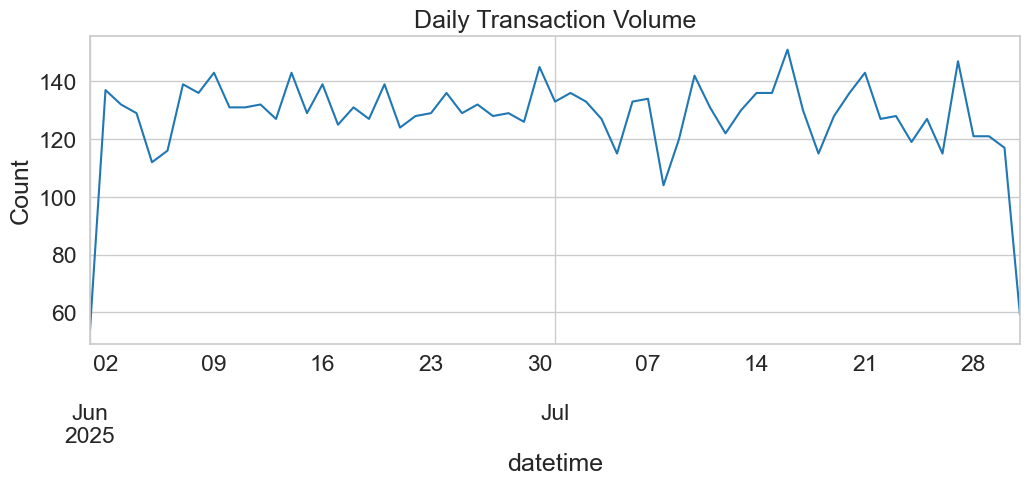

In [9]:
df.set_index("datetime")["user_id"].resample("D").count().plot(
    title="Daily Transaction Volume",
    figsize=(12, 4))
plt.ylabel("Count")
plt.show()

##### B. Hourly Activity Heatmap

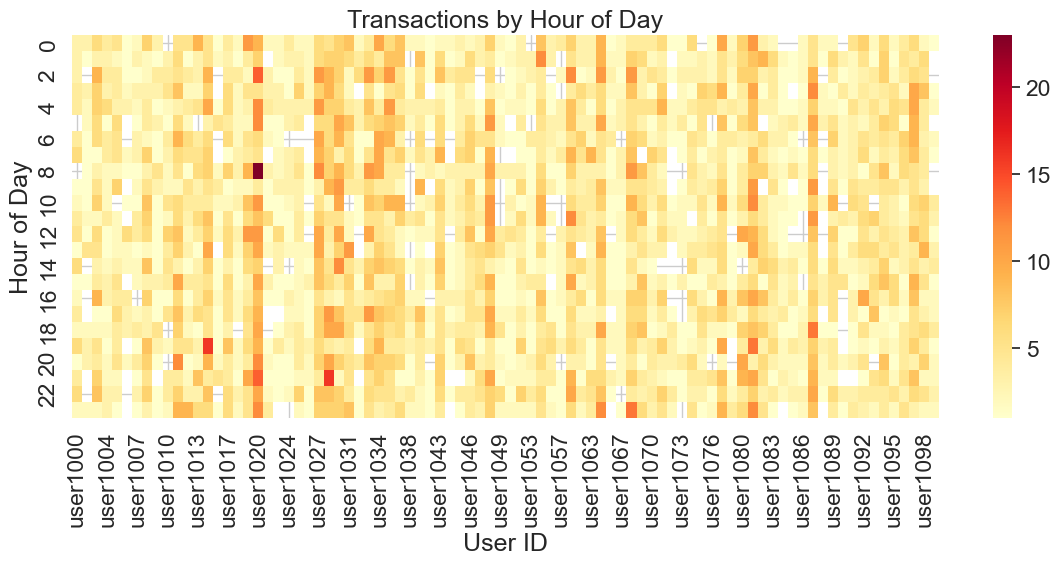

In [10]:
hourly = df.assign(hour=df["datetime"].dt.hour)\
           .groupby(["hour", "user_id"]).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(hourly, cmap="YlOrRd")
plt.title("Transactions by Hour of Day")  # Moved title here
plt.xlabel("User ID")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

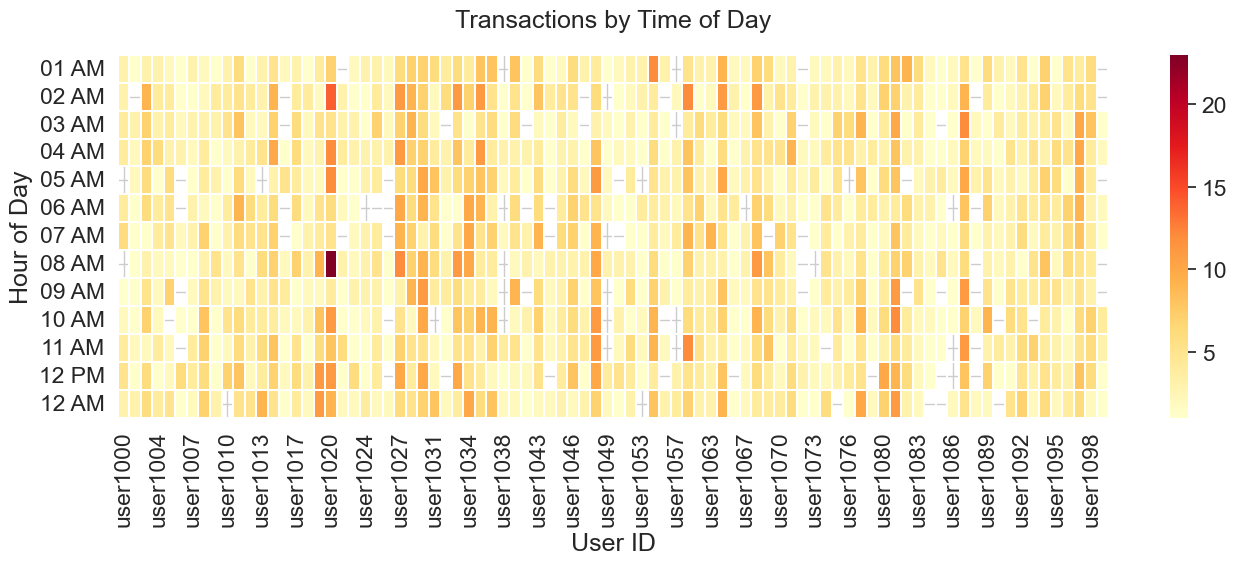

In [11]:
hourly = df.assign(
    hour=df["datetime"].dt.strftime("%I %p")  # %I=12-hour, %p=AM/PM
).groupby(["hour", "user_id"]).size().unstack()

# Order hours chronologically
hour_order = [f"{h:02d} {'AM' if h < 12 else 'PM'}" 
              for h in range(1, 13)] + ["12 AM"]
hourly = hourly.reindex(hour_order)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(hourly, cmap="YlOrRd", linewidths=0.3)
plt.title("Transactions by Time of Day", pad=20)
plt.xlabel("User ID")
plt.ylabel("Hour of Day")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()